In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import librosa

import librosa.display

/usr/local/lib/python2.7/dist-packages/librosa/__init__.py:40: DeprecationWarning: You are using librosa with Python 2. Please note that librosa 0.7 will be the last version to support Python 2, after which it will require Python 3 or later.
  DeprecationWarning)


In [2]:
import IPython.display

In [3]:
y, sr = librosa.load('a.wav')

In [4]:
y

array([-0.02075909, -0.00175975,  0.02818375, ..., -0.11137239,
       -0.0669859 ,  0.        ], dtype=float32)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
IPython.display.Audio(data=y, rate=sr)

In [7]:
S_full, phase = librosa.magphase(librosa.stft(y))

In [8]:
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

In [9]:
S_filter = np.minimum(S_full, S_filter)

In [10]:
S_filter

array([[4.99083959e-02, 6.39547855e-02, 8.70611593e-02, ...,
        1.85743328e-02, 3.22527252e-02, 1.05180383e-01],
       [8.51658881e-02, 9.18518305e-02, 1.00435205e-01, ...,
        8.50015059e-02, 6.30519167e-02, 1.46320209e-01],
       [1.51902080e-01, 1.61385864e-01, 1.54748157e-01, ...,
        8.79917294e-02, 1.63197011e-01, 1.76187336e-01],
       ...,
       [9.17669531e-05, 9.53061390e-05, 5.19931928e-05, ...,
        1.20391749e-04, 9.34055352e-05, 1.14605122e-04],
       [8.66275732e-05, 9.84280341e-05, 3.26840236e-05, ...,
        1.07749496e-04, 1.10455629e-04, 1.02113278e-04],
       [6.80152516e-05, 6.66644191e-05, 3.02152730e-05, ...,
        6.60594815e-05, 8.73189565e-05, 8.73189565e-05]], dtype=float32)

In [11]:
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)


In [12]:
S_foreground = mask_v * S_full
S_background = mask_i * S_full

In [13]:
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)

In [14]:
y_hat

array([-0.00487369, -0.00496803, -0.00558983, ...,  0.00026031,
        0.00022894,  0.00021596], dtype=float32)

In [15]:
IPython.display.Audio(data=y_hat, rate=sr)

In [16]:
IPython.display.Audio(data=y_hat1, rate=sr)

In [17]:
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr)

In [18]:
mfcc

array([[-538.3695   , -543.0813   , -543.8491   , ..., -736.49725  ,
        -728.7792   , -726.8772   ],
       [ 192.80414  ,  187.94891  ,  180.11838  , ...,   56.292385 ,
          60.482365 ,   59.05382  ],
       [  25.846907 ,   31.974062 ,   23.279856 , ...,   35.921288 ,
          37.16366  ,   34.892044 ],
       ...,
       [ -33.44017  ,  -40.616905 ,  -48.654526 , ...,   -9.865563 ,
          -5.2559977,   -3.1689005],
       [  -6.528473 ,  -11.093666 ,  -18.497847 , ...,   -1.4249234,
          -4.5477557,   -5.7029686],
       [  -8.882086 ,  -15.409983 ,  -13.571103 , ...,   -1.5345623,
          -3.6177   ,   -5.6931686]], dtype=float32)

In [19]:
mfcc.shape

(20, 439)

In [20]:
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)

In [21]:
mfcc

array([[-538.3695   , -543.0813   , -543.8491   , ..., -736.49725  ,
        -728.7792   , -726.8772   ],
       [ 192.80414  ,  187.94891  ,  180.11838  , ...,   56.292385 ,
          60.482365 ,   59.05382  ],
       [  25.846907 ,   31.974062 ,   23.279856 , ...,   35.921288 ,
          37.16366  ,   34.892044 ],
       ...,
       [  -9.258478 ,  -17.655748 ,  -34.674065 , ...,   10.227917 ,
           9.41709  ,    6.910983 ],
       [   4.3198557,    3.442861 ,   -1.3919598, ...,   -1.856561 ,
          -3.3795648,   -6.419487 ],
       [  23.645916 ,   24.259129 ,   21.678623 , ...,   -4.972208 ,
          -4.6744657,   -7.7735467]], dtype=float32)

In [22]:
mfcc.shape

(12, 439)

In [24]:
mfcc1 = librosa.feature.mfcc(y=y, sr=sr,  n_mfcc=12)

In [26]:
y_l, sr = librosa.load('b.wav')

In [27]:
S_full, phase = librosa.magphase(librosa.stft(y_l))

In [28]:
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

In [29]:
S_filter = np.minimum(S_full, S_filter)

In [30]:
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

In [31]:
S_foreground = mask_v * S_full
S_background = mask_i * S_full

In [32]:
y_l_hat = librosa.istft(S_foreground)
y_l_hat1 = librosa.istft(S_background)

In [33]:
IPython.display.Audio(data=y_l_hat, rate=sr)

In [34]:
IPython.display.Audio(data=y_l_hat1, rate=sr)

Text(0.5,1,'audio_a')

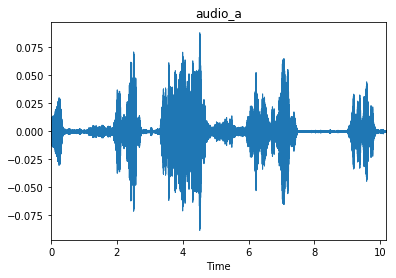

In [35]:
librosa.display.waveplot(y_hat, sr=sr)
plt.title('audio_a')

Text(0.5,1,'audio_a_n')

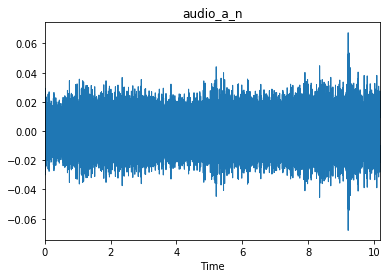

In [36]:
librosa.display.waveplot(y_hat1, sr=sr)
plt.title('audio_a_n')

Text(0.5,1,'audio_b')

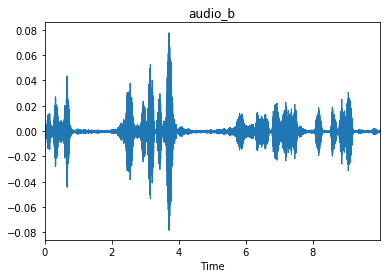

In [37]:
librosa.display.waveplot(y_l_hat, sr=sr)
plt.title('audio_b')

Text(0.5,1,'audio_b_n')

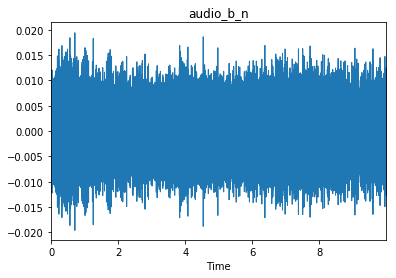

In [38]:
librosa.display.waveplot(y_l_hat1, sr=sr)
plt.title('audio_b_n')

Text(0.5,1,'audio')

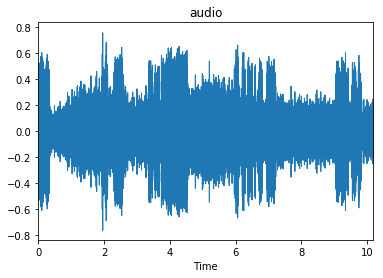

In [39]:
librosa.display.waveplot(y, sr=sr)
plt.title('audio')

Text(0.5,1,'audio_b_o')

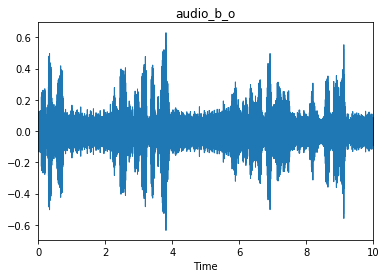

In [40]:
librosa.display.waveplot(y_l, sr=sr)
plt.title('audio_b_o')

In [41]:
mfcc_l = librosa.feature.mfcc(y=y_l_hat, sr=sr,  n_mfcc=12)

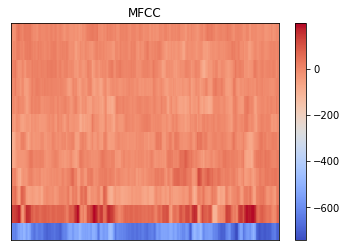

In [42]:
librosa.display.specshow(mfcc_l)
plt.title('MFCC')
plt.colorbar()

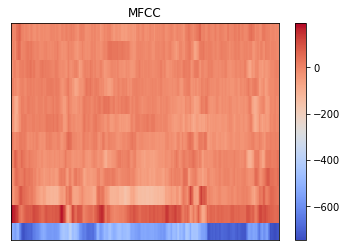

In [44]:
librosa.display.specshow(mfcc)
plt.title('MFCC')
plt.colorbar()

In [51]:
def get_mfcc(path):
    y, sr = librosa.load(path)
    S_full, phase = librosa.magphase(librosa.stft(y))
    S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
    S_filter = np.minimum(S_full, S_filter)
    margin_i, margin_v = 2, 10
    power = 2

    mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

    mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
    S_foreground = mask_v * S_full
    S_background = mask_i * S_full
    
    y_hat = librosa.istft(S_foreground)
    y_hat1 = librosa.istft(S_background)
    
    mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
    
    plt.figure(figsize=(10, 4))
    plt.subplot(3, 1, 1)
    librosa.display.specshow(mfcc)
    plt.title('MFCC')
    plt.colorbar()

    plt.subplot(3, 1, 2)
    librosa.display.waveplot(y_hat, sr=sr)
    plt.title('audio')
    
    plt.subplot(3, 1, 3)
    librosa.display.waveplot(y_hat1, sr=sr)
    plt.title('back_g')
   

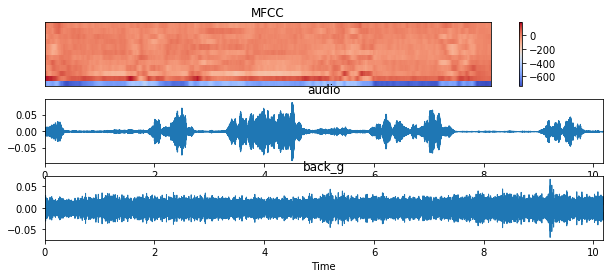

In [52]:
get_mfcc('a.wav')

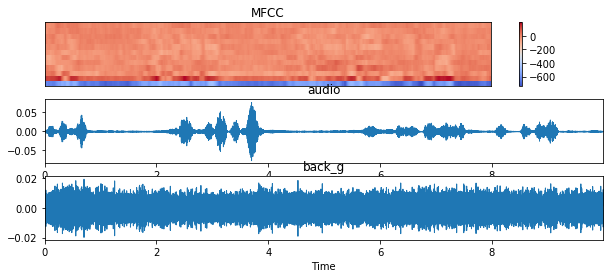

In [53]:
get_mfcc('b.wav')

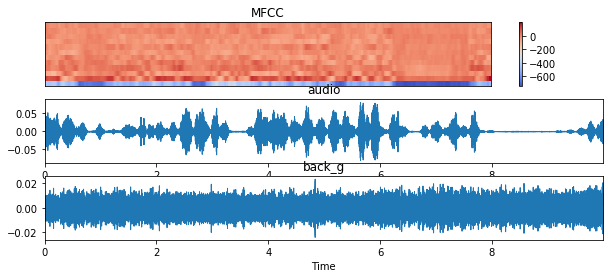

In [54]:
get_mfcc('c.wav')

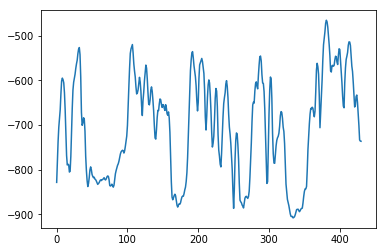

In [80]:
plt.plot(mfcc[0])

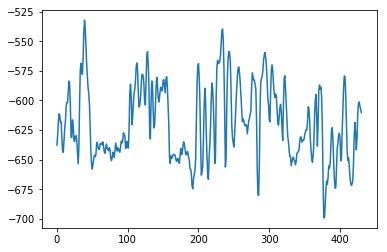

In [81]:
plt.plot(mfcc1[0])

Text(0.5,1,'back_g')

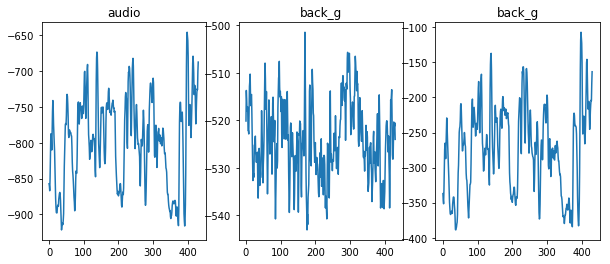

In [82]:
y, sr = librosa.load('goal.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)
 
plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
plt.plot(mfcc[0])
plt.title('audio')
    
plt.subplot(1, 3, 2)
plt.plot(mfcc1[0])
plt.title('back_g')

plt.subplot(1, 3, 3)
plt.plot(mfcc[0] - mfcc1[0])
plt.title('back_g')

Text(0.5,1,'back_g')

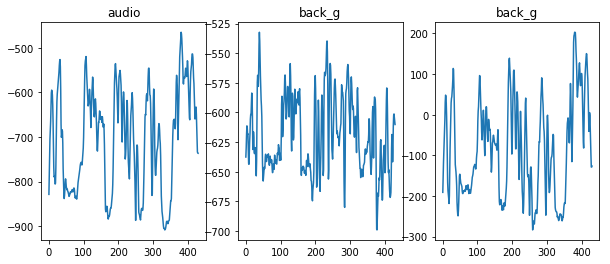

In [83]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)
 
plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
plt.plot(mfcc[0])
plt.title('audio')
    
plt.subplot(1, 3, 2)
plt.plot(mfcc1[0])
plt.title('back_g')

plt.subplot(1, 3, 3)
plt.plot(mfcc[0] - mfcc1[0])
plt.title('back_g')

Text(0.5,1,'back_g')

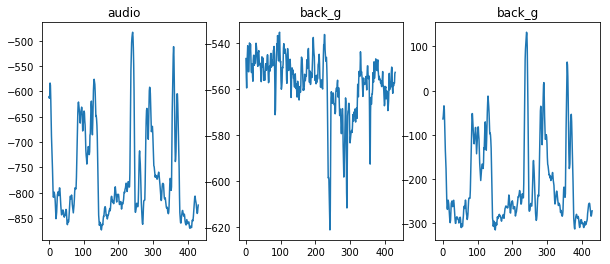

In [84]:
y, sr = librosa.load('lo2.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)
 
plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
plt.plot(mfcc[0])
plt.title('audio')
    
plt.subplot(1, 3, 2)
plt.plot(mfcc1[0])
plt.title('back_g')

plt.subplot(1, 3, 3)
plt.plot(mfcc[0] - mfcc1[0])
plt.title('back_g')

Text(0.5,1,'back_g')

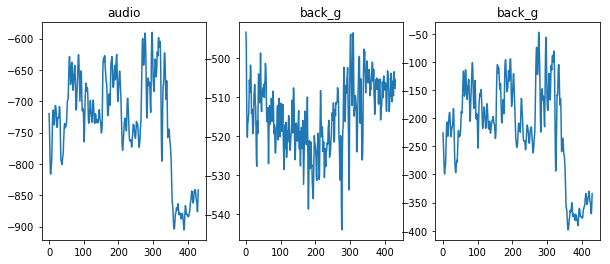

In [85]:
y, sr = librosa.load('hi.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)
 
plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
plt.plot(mfcc[0])
plt.title('audio')
    
plt.subplot(1, 3, 2)
plt.plot(mfcc1[0])
plt.title('back_g')

plt.subplot(1, 3, 3)
plt.plot(mfcc[0] - mfcc1[0])
plt.title('back_g')

In [1]:
D = np.abs(librosa.stft(y_hat1))

NameError: name 'np' is not defined

In [2]:
import numpy as np

In [3]:
D = np.abs(librosa.stft(y_hat1))

NameError: name 'librosa' is not defined

In [4]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa

import librosa.display
import IPython.display

/usr/local/lib/python2.7/dist-packages/librosa/__init__.py:40: DeprecationWarning: You are using librosa with Python 2. Please note that librosa 0.7 will be the last version to support Python 2, after which it will require Python 3 or later.
  DeprecationWarning)


Text(0.5,1,'back_g')

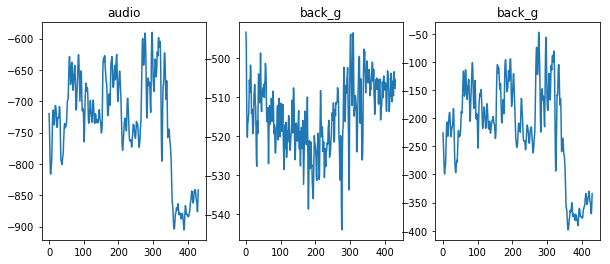

In [5]:
y, sr = librosa.load('hi.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)
 
plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
plt.plot(mfcc[0])
plt.title('audio')
    
plt.subplot(1, 3, 2)
plt.plot(mfcc1[0])
plt.title('back_g')

plt.subplot(1, 3, 3)
plt.plot(mfcc[0] - mfcc1[0])
plt.title('back_g')

In [10]:
import scipy.fftpack

In [11]:
from scipy.fftpack import fft

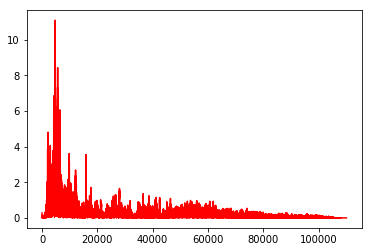

In [14]:
c = fft(y_hat) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 

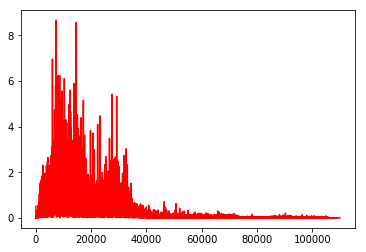

In [15]:
c = fft(y_hat1) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r')

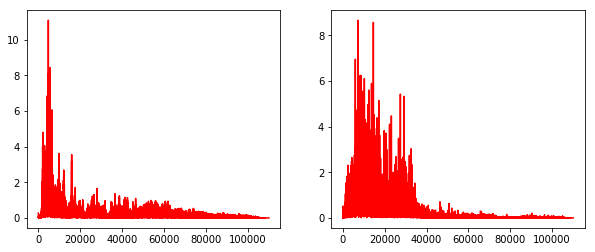

In [17]:
y, sr = librosa.load('hi.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)
 
plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
c = fft(y_hat) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
    
plt.subplot(1, 2, 2)
c1 = fft(y_hat1) # calculate fourier transform (complex numbers list)
d1 = len(c1)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c1[:(d1-1)]),'r') 



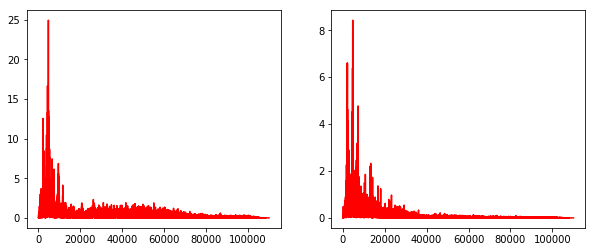

In [18]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)
 
plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
c = fft(y_hat) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
    
plt.subplot(1, 2, 2)
c1 = fft(y_hat1) # calculate fourier transform (complex numbers list)
d1 = len(c1)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c1[:(d1-1)]),'r') 


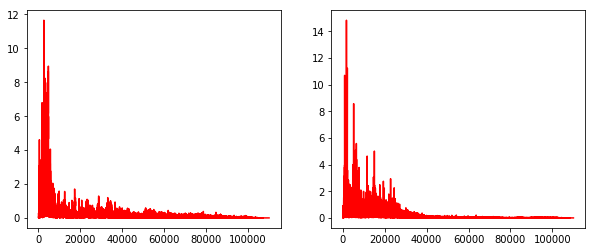

In [19]:
y, sr = librosa.load('lo2.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)
 
plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
c = fft(y_hat) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
    
plt.subplot(1, 2, 2)
c1 = fft(y_hat1) # calculate fourier transform (complex numbers list)
d1 = len(c1)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c1[:(d1-1)]),'r') 


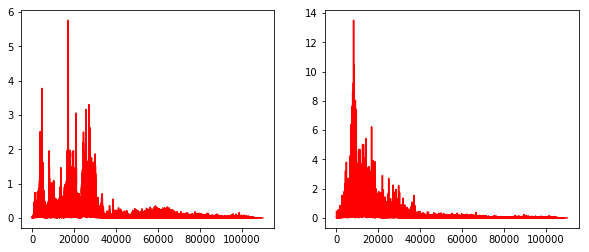

In [20]:
y, sr = librosa.load('goal.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)
 
plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
c = fft(y_hat) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
    
plt.subplot(1, 2, 2)
c1 = fft(y_hat1) # calculate fourier transform (complex numbers list)
d1 = len(c1)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c1[:(d1-1)]),'r') 


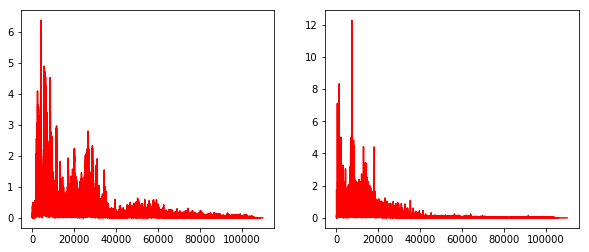

In [21]:
y, sr = librosa.load('lo1.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)

fc = 15000
w = fc / (sr / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'low')
output = signal.filtfilt(b, a, y_hat1)

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
c = fft(y_hat) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
    
plt.subplot(1, 2, 2)
c1 = fft(output) # calculate fourier transform (complex numbers list)
d1 = len(c1)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c1[:(d1-1)]),'r') 


In [22]:
y, sr = librosa.load('lo1.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)

fc = 15000
w = fc / (sr / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'low')
output = signal.filtfilt(b, a, y_hat1)

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
c = fft(y_hat) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
    
plt.subplot(1, 2, 2)
c1 = fft(output) # calculate fourier transform (complex numbers list)
d1 = len(c1)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c1[:(d1-1)]),'r') 


NameError: name 'signal' is not defined

In [23]:
from scipy import signal

In [24]:
y, sr = librosa.load('lo1.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)

fc = 15000
w = fc / (sr / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'low', analog=True)
output = signal.filtfilt(b, a, y_hat1)

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
c = fft(y_hat) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
    
plt.subplot(1, 2, 2)
c1 = fft(output) # calculate fourier transform (complex numbers list)
d1 = len(c1)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c1[:(d1-1)]),'r') 


ValueError: Digital filter critical frequencies must be 0 < Wn < 1

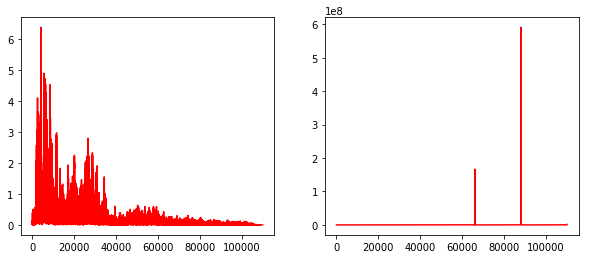

In [25]:
y, sr = librosa.load('lo1.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])
    

In [26]:
from scipy.fftpack import fft,fftfreq

ZeroDivisionError: float division by zero

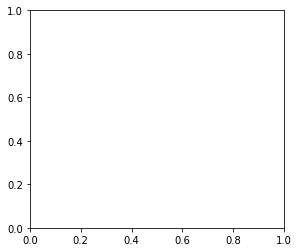

In [27]:
y, sr = librosa.load('lo1.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])
    

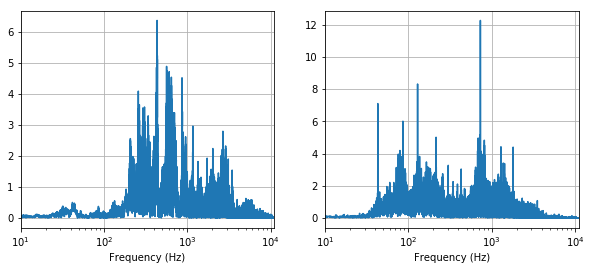

In [28]:
y, sr = librosa.load('lo1.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])
    

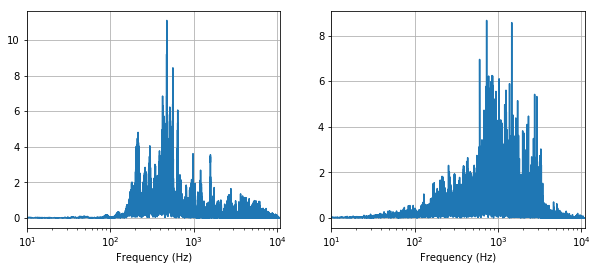

In [29]:
y, sr = librosa.load('hi.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])
    

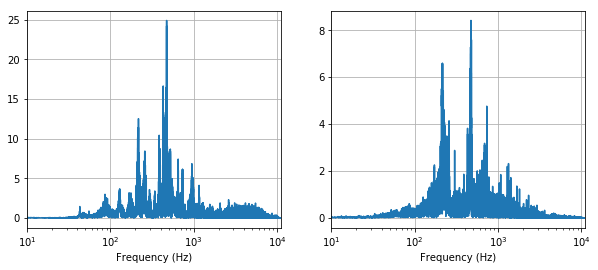

In [30]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])
    

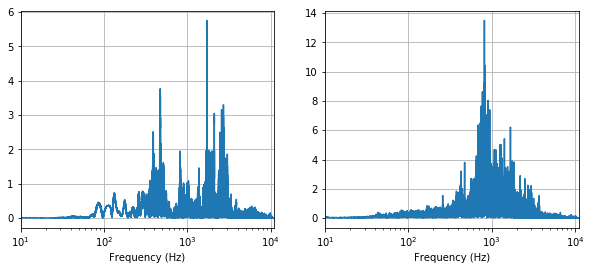

In [31]:
y, sr = librosa.load('goal.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])
    

In [32]:
datafft1

array([-0.43260393+0.j        ,  0.06999234-0.01825814j,
       -0.04097755+0.02157781j, ..., -0.00720823-0.00797999j,
       -0.04097755-0.02157781j,  0.06999234+0.01825814j], dtype=complex64)

In [33]:
datafft1.shape

(220160,)

In [34]:
fftabs1.shape

(220160,)

In [35]:
freqs1.shape

(220160,)

In [36]:
fftabs1

array([0.43260393, 0.07233455, 0.04631156, ..., 0.01075355, 0.04631156,
       0.07233455], dtype=float32)

In [37]:
freqs1

array([ 0.        ,  0.10015443,  0.20030887, ..., -0.3004633 ,
       -0.20030887, -0.10015443])

In [38]:
freqs1[10000]

1001.5443313953489

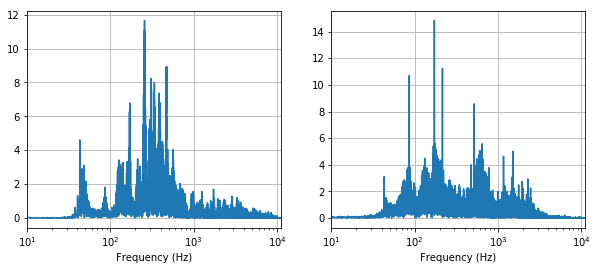

In [39]:
y, sr = librosa.load('lo2.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

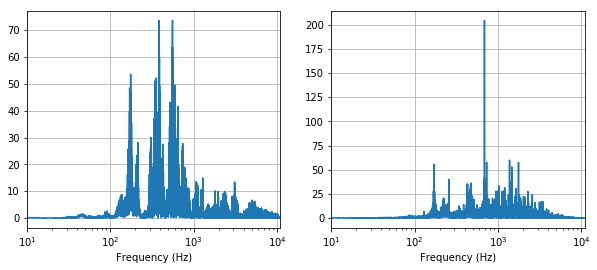

In [40]:
y, sr = librosa.load('e.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

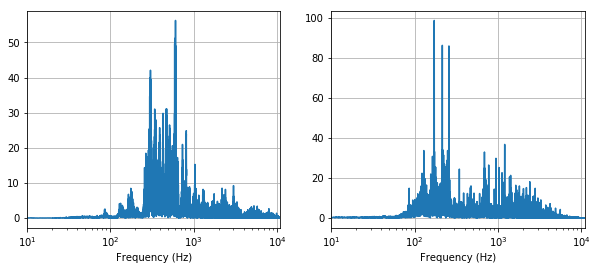

In [41]:
y, sr = librosa.load('h.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

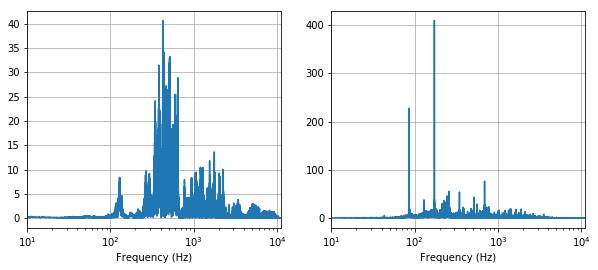

In [42]:
y, sr = librosa.load('k.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

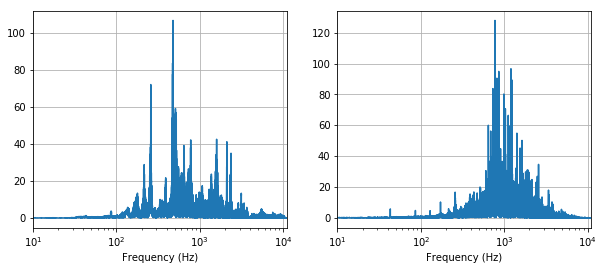

In [43]:
y, sr = librosa.load('a.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],freqs1[:int(freqs1.size/2)])
plt.plot(freqs1[:int(freqs1.size/2)],C)

In [44]:
C = np.multiply(fftabs1,freqs1)

In [45]:
C

array([ 0.        ,  0.0241455 ,  0.08553827, ..., -0.08053983,
       -0.08553827, -0.0241455 ])

In [46]:
C = np.multiply(fftabs1[:int(freqs1.size/2)],freqs1[:int(freqs1.size/2)])

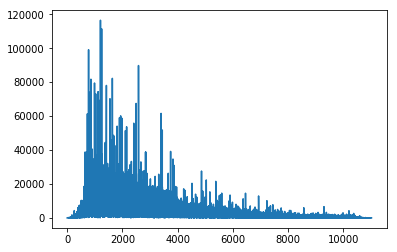

In [47]:
plt.plot(freqs1[:int(freqs1.size/2)],C)

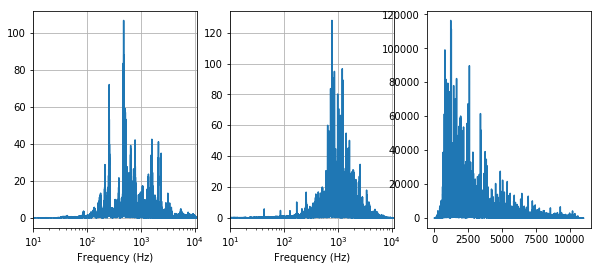

In [48]:
y, sr = librosa.load('a.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],freqs1[:int(freqs1.size/2)])
plt.plot(freqs1[:int(freqs1.size/2)],C)

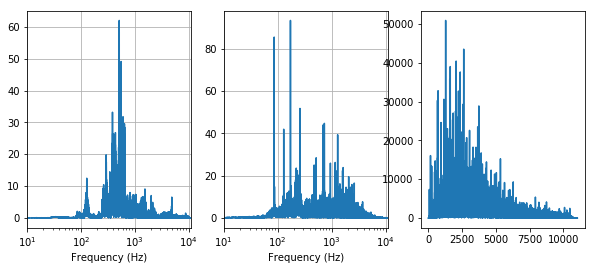

In [49]:
y, sr = librosa.load('b.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],freqs1[:int(freqs1.size/2)])
plt.plot(freqs1[:int(freqs1.size/2)],C)

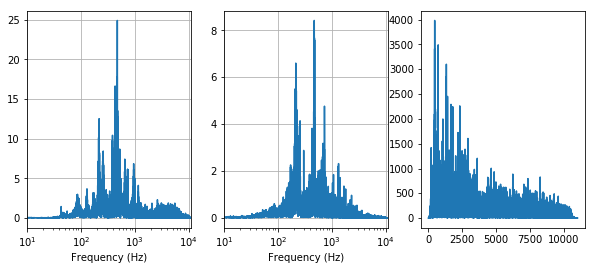

In [50]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],freqs1[:int(freqs1.size/2)])
plt.plot(freqs1[:int(freqs1.size/2)],C)

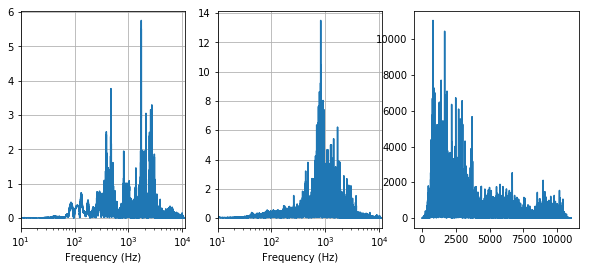

In [51]:
y, sr = librosa.load('goal.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],freqs1[:int(freqs1.size/2)])
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.plot(freqs1[:int(freqs1.size/2)],C)

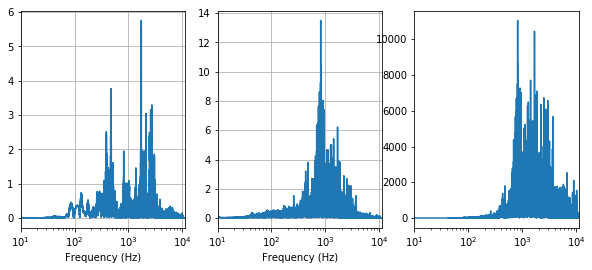

In [52]:
y, sr = librosa.load('goal.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],freqs1[:int(freqs1.size/2)])
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.plot(freqs1[:int(freqs1.size/2)],C)

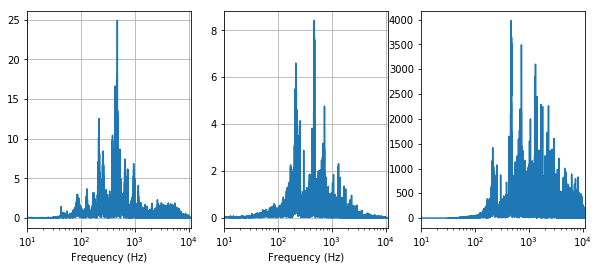

In [53]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],freqs1[:int(freqs1.size/2)])
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.plot(freqs1[:int(freqs1.size/2)],C)

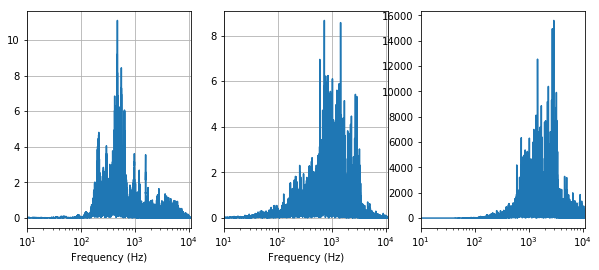

In [54]:
y, sr = librosa.load('hi.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],freqs1[:int(freqs1.size/2)])
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.plot(freqs1[:int(freqs1.size/2)],C)

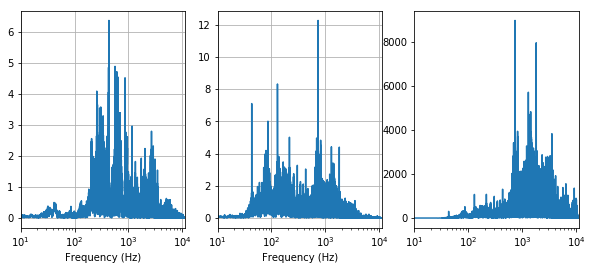

In [55]:
y, sr = librosa.load('lo1.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],freqs1[:int(freqs1.size/2)])
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.plot(freqs1[:int(freqs1.size/2)],C)

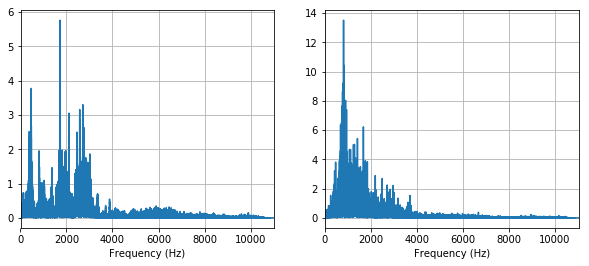

In [56]:
y, sr = librosa.load('goal.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
#plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
#plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log


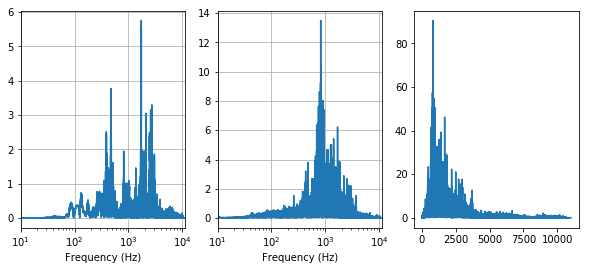

In [57]:
y, sr = librosa.load('goal.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])


plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],np.log(freqs1[:int(freqs1.size/2)]))
#plt.xlim( [10, sr/2] )
#plt.xscale( 'log' )
plt.plot(freqs1[:int(freqs1.size/2)],C)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log


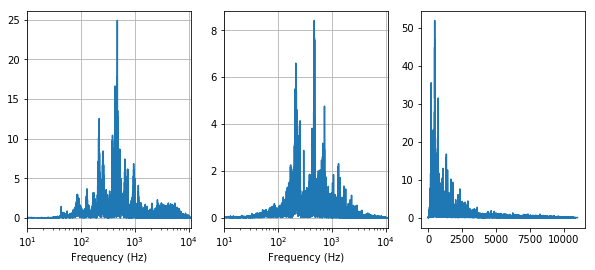

In [58]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])


plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],np.log(freqs1[:int(freqs1.size/2)]))
#plt.xlim( [10, sr/2] )
#plt.xscale( 'log' )
plt.plot(freqs1[:int(freqs1.size/2)],C)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log


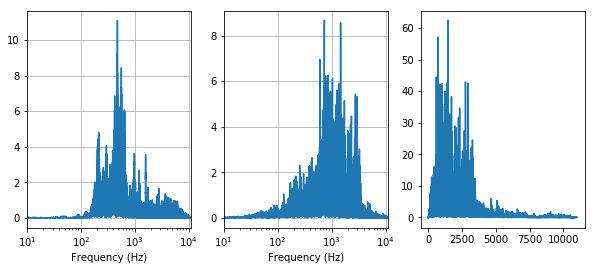

In [59]:
y, sr = librosa.load('hi.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])


plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],np.log(freqs1[:int(freqs1.size/2)]))
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.plot(freqs1[:int(freqs1.size/2)],C)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log


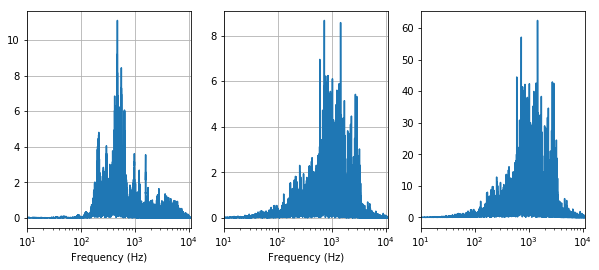

In [60]:
y, sr = librosa.load('hi.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

plt.figure(figsize=(10, 4))
   

plt.subplot(1, 3, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 3, 2)
datafft1 = fft(y_hat1)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])


plt.subplot(1, 3, 3)
C = np.multiply(fftabs1[:int(freqs1.size/2)],np.log(freqs1[:int(freqs1.size/2)]))
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.plot(freqs1[:int(freqs1.size/2)],C)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log


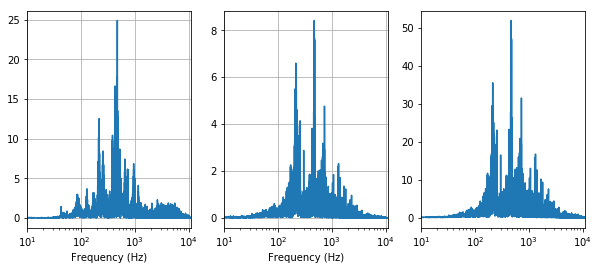

In [61]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

order = 6
fs = sr       # sample rate, Hz
cutoff = 5000  # desired cutoff frequency of the filter, Hz

nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
y = lfilter(b, a, y_hat1)



plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])




In [62]:
from scipy.signal import butter, lfilter, freqz

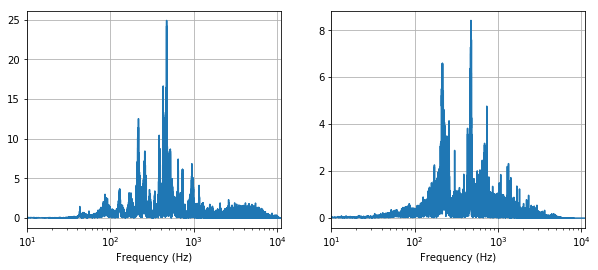

In [63]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

order = 6
fs = sr       # sample rate, Hz
cutoff = 5000  # desired cutoff frequency of the filter, Hz

nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
y = lfilter(b, a, y_hat1)



plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat1)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])




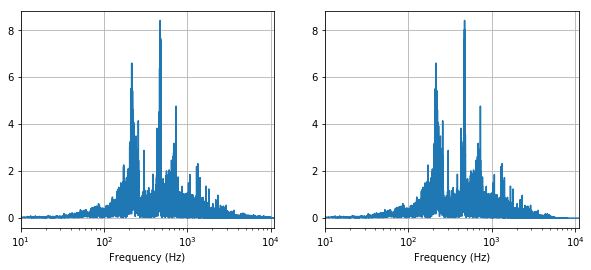

In [64]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

order = 2
fs = sr       # sample rate, Hz
cutoff = 5000  # desired cutoff frequency of the filter, Hz

nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
y = lfilter(b, a, y_hat1)



plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat1)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(y)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

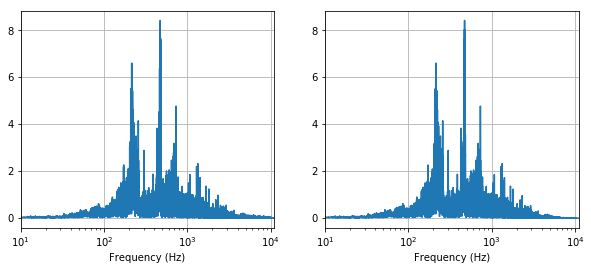

In [65]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

order = 2
fs = sr       # sample rate, Hz
cutoff = 5000  # desired cutoff frequency of the filter, Hz

nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
yf = lfilter(b, a, y_hat1)



plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat1)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(yf)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

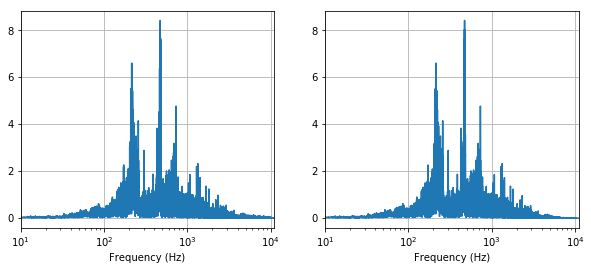

In [66]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

order = 2
fs = sr       # sample rate, Hz
cutoff = 5000  # desired cutoff frequency of the filter, Hz

nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
yf = lfilter(b, a, y_hat1)



plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat1)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(yf)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

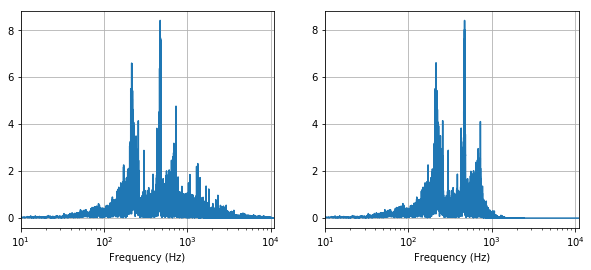

In [67]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

order = 6
fs = sr       # sample rate, Hz
cutoff = 800  # desired cutoff frequency of the filter, Hz

nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
yf = lfilter(b, a, y_hat1)



plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat1)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(yf)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

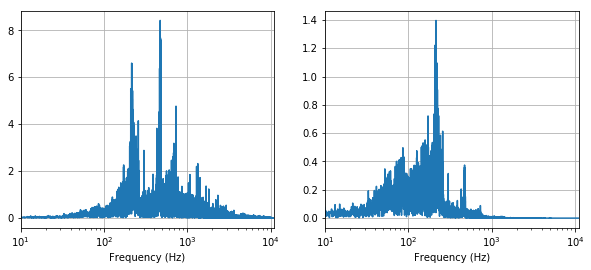

In [68]:
y, sr = librosa.load('low.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

order = 2
fs = sr       # sample rate, Hz
cutoff = 100  # desired cutoff frequency of the filter, Hz

nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
yf = lfilter(b, a, y_hat1)



plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat1)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(yf)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])

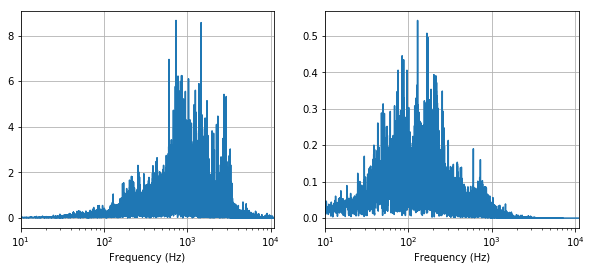

In [69]:
y, sr = librosa.load('hi.wav')
S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)
    
S_foreground = mask_v * S_full
S_background = mask_i * S_full
    
y_hat = librosa.istft(S_foreground)
y_hat1 = librosa.istft(S_background)
    
#mfcc = librosa.feature.mfcc(y=y_hat, sr=sr,  n_mfcc=12)
#mfcc1 = librosa.feature.mfcc(y=y_hat1, sr=sr,  n_mfcc=12)


#fc = 15000
#w = fc / (sr / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low', analog=True)
#output = signal.filtfilt(b, a, y_hat1)
samples = y_hat.shape[0]

order = 2
fs = sr       # sample rate, Hz
cutoff = 100  # desired cutoff frequency of the filter, Hz

nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
yf = lfilter(b, a, y_hat1)



plt.figure(figsize=(10, 4))
   

plt.subplot(1, 2, 1)
datafft = fft(y_hat1)
fftabs = abs(datafft)
freqs = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
    
plt.subplot(1, 2, 2)
datafft1 = fft(yf)
fftabs1 = abs(datafft1)
freqs1 = fftfreq(samples,1.0/sr)
plt.xlim( [10, sr/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs1[:int(freqs1.size/2)],fftabs1[:int(freqs1.size/2)])